In [18]:
import numpy as np
import datetime
start=datetime.datetime.now()
print(start)

2021-12-03 00:51:18.390873


In [19]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\tmj89\Desktop\Codes


In [20]:
# -*- coding: utf-8 -*-
import pandas as pd
load = pd.read_csv(r'C:\Users\tmj89\Desktop\Codes\dataset_train_4_0to200.csv')

In [21]:
load.head

<bound method NDFrame.head of       Delivery Date  Delivery Hour Repeated Hour Flag Settlement Point Name  \
0          1/1/2015              1                  N            LZ_HOUSTON   
1          1/1/2015              2                  N            LZ_HOUSTON   
2          1/1/2015              3                  N            LZ_HOUSTON   
3          1/1/2015              4                  N            LZ_HOUSTON   
4          1/1/2015              5                  N            LZ_HOUSTON   
...             ...            ...                ...                   ...   
34633    12/31/2018             20                  N            LZ_HOUSTON   
34634    12/31/2018             21                  N            LZ_HOUSTON   
34635    12/31/2018             22                  N            LZ_HOUSTON   
34636    12/31/2018             23                  N            LZ_HOUSTON   
34637    12/31/2018             24                  N            LZ_HOUSTON   

      Settlement Poin

In [22]:
load.dtypes

import datetime
load['year'] = pd.DatetimeIndex(load['Delivery Date']).year
load['day'] = pd.DatetimeIndex(load['Delivery Date']).day# Extracting Day from "Delivery Date"
load['month'] = pd.DatetimeIndex(load['Delivery Date']).month   # Extracting Month from "Delivery Date"


a = load['Delivery Date']
a= pd.to_datetime(a)

load['dayofweek'] = a.dt.dayofweek
load['dayofweek']

0        3
1        3
2        3
3        3
4        3
        ..
34633    0
34634    0
34635    0
34636    0
34637    0
Name: dayofweek, Length: 34638, dtype: int64

In [23]:
load = load.set_index(['Delivery Date']) 
load = load.drop(columns=['year','day','Settlement Point Name','Settlement Point Type'], axis=1)  
# Re-arranging Columns
load = load[['dayofweek','month','Delivery Hour','Temperature in F','Load in Houston', 'Settlement Point Price']]
load.head()

,dayofweek,month,Delivery Hour,Temperature in F,Load in Houston,Settlement Point Price
Delivery Date,,,,,,
1/1/2015,3,1,1,44,9844.20,22.47
1/1/2015,3,1,2,44,9653.46,22.31
1/1/2015,3,1,3,44,9502.30,22.20
1/1/2015,3,1,4,44,9474.48,22.13
1/1/2015,3,1,5,44,9554.37,22.16


In [24]:
load.dtypes

dayofweek                   int64
month                       int64
Delivery Hour               int64
Temperature in F            int64
Load in Houston           float64
Settlement Point Price    float64
dtype: object

In [25]:
# Removing "," from columns "Load in Houston" , "Ercot Load" and "Settlement Point Price"
load['Load in Houston'] = load['Load in Houston'].astype(str).str.replace(r',', '')
#load['Ercot Load'] = load['Ercot Load'].astype(str).str.replace(r',', '')
load['Settlement Point Price'] = load['Settlement Point Price'].astype(str).str.replace(r',', '')
load.head()


,dayofweek,month,Delivery Hour,Temperature in F,Load in Houston,Settlement Point Price
Delivery Date,,,,,,
1/1/2015,3,1,1,44,9844.2,22.47
1/1/2015,3,1,2,44,9653.46,22.31
1/1/2015,3,1,3,44,9502.3,22.2
1/1/2015,3,1,4,44,9474.48,22.13
1/1/2015,3,1,5,44,9554.37,22.16


In [26]:
load['Settlement Point Price'] = load['Settlement Point Price'].astype(float)
load['Temperature in F'] = load['Temperature in F'].astype(float)
#load['Load in Houston'] = load['Load in Houston'].astype(float)
#load['Ercot Load'] = load['Ercot Load'].astype(float)
load.dtypes

dayofweek                   int64
month                       int64
Delivery Hour               int64
Temperature in F          float64
Load in Houston            object
Settlement Point Price    float64
dtype: object

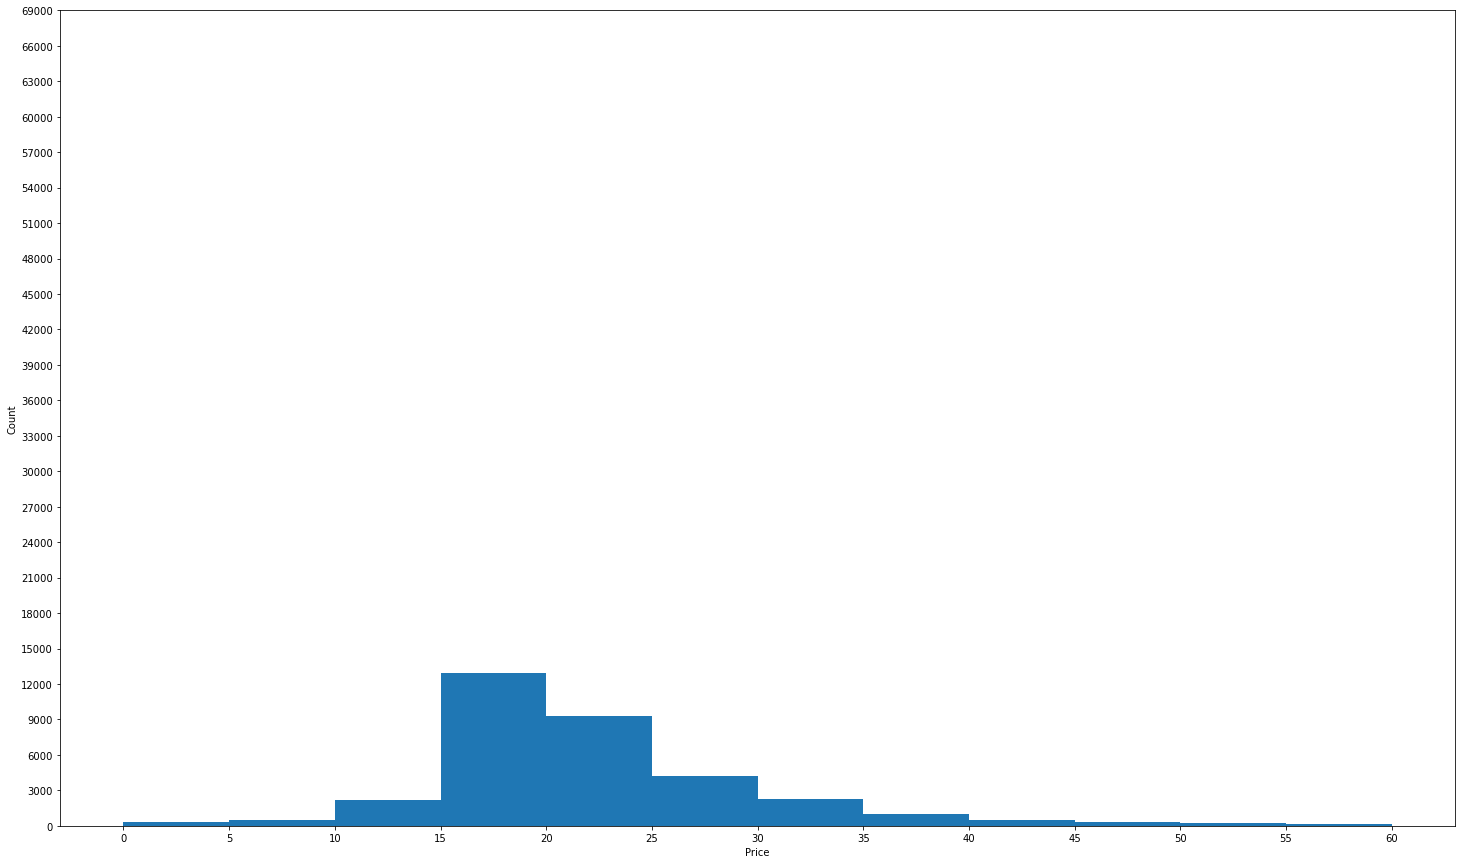

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
plt.hist(load['Settlement Point Price'], bins = (0,5,10,15,20,25,30,35,40,45,50,55,60))
plt.xticks(np.arange(0,61,5))
plt.yticks(np.arange(0,70000,3000))
plt.xlabel("Price")
_ = plt.ylabel("Count")

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("1",OneHotEncoder(sparse=False),make_column_selector(pattern = 'month')),
                             ("2",OneHotEncoder(sparse=False),make_column_selector(pattern = 'dayofweek')),
                             ("3",OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Hour')),
                             #("4",OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Interval')),
                             #("6",OneHotEncoder(sparse=False),make_column_selector(pattern = 'DayStatus')),
                             ("7",StandardScaler(copy=True), make_column_selector(pattern = 'Temperature in F')),
                             ("8",StandardScaler(copy=True), make_column_selector(pattern = 'Load in Houston')),
                             #("9",StandardScaler(copy=True), make_column_selector(pattern = 'Ercot Load')),
                             #("10",StandardScaler(copy=True),make_column_selector(pattern = 'Rise')),
                             ("y",StandardScaler(copy=True), make_column_selector(pattern = 'Settlement Point Price'))])

In [29]:
import numpy
dataset=load.values
#numpy.around(dataset, decimals=2, out=None)
normed_data = ct.fit_transform(load)
print(normed_data.shape)

(34638, 46)


In [30]:
from sklearn.model_selection import train_test_split

# splitting dataset into 'training dataset' and 'validation and test dataset'
Train, Test = train_test_split(normed_data, test_size=0.1, shuffle = False)

print(Train.shape, Test.shape)

(31174, 46) (3464, 46)


In [31]:
Test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.98140551,  0.6878887 ,
       -0.17122064])

In [32]:
train_labels = Train[:,(Train.shape[1]-1)]

In [33]:
test_labels = Test[:,(Test.shape[1]-1)]

In [34]:
print(train_labels.shape, test_labels.shape)

(31174,) (3464,)


In [35]:
train_labels

array([-0.0636385 , -0.07057928, -0.07535107, ...,  0.34716911,
        0.1853621 , -0.02416279])

In [36]:
test_labels

array([-0.17122064, -0.22197512, -0.24409887, ..., -0.34257123,
       -0.32738827, -0.37120196])

In [37]:
Xtrain = Train[:,0:(Train.shape[1]-1)]
Xtrain[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.74483262, -0.75033036])

In [38]:
Xtest = Test[:,0:(Test.shape[1]-1)]
Xtest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.98140551, 0.6878887 ])

In [39]:
from sklearn import svm
start=datetime.datetime.now()
print(start)
clf = svm.SVR()
clf.fit(Xtrain,train_labels)
stop=datetime.datetime.now()
print(stop)

2021-12-03 00:51:29.960701
2021-12-03 00:53:05.157023


In [40]:
import datetime
c=datetime.datetime.now()
print(c)
test_predictions = clf.predict(Xtest)
op_list= []
for i in range (0, len(test_predictions)):
  op_list.append((test_predictions[i]))
len(op_list)

2021-12-03 02:38:51.328493


3464

In [41]:
mm= []
for i in range (0, len(test_labels)):
  mm.append((test_labels[i]))
test_labels=pd.DataFrame({'actual':mm})
test_labels['actual']=ct.named_transformers_['y'].inverse_transform(test_labels)
test_labels['actual']

0       19.99
1       18.82
2       18.31
3       17.84
4       17.73
        ...  
3459    21.45
3460    18.50
3461    16.04
3462    16.39
3463    15.38
Name: actual, Length: 3464, dtype: float64

In [42]:
predictions=pd.DataFrame({'predict':op_list})
predictions['predict'] = ct.named_transformers_['y'].inverse_transform(predictions)

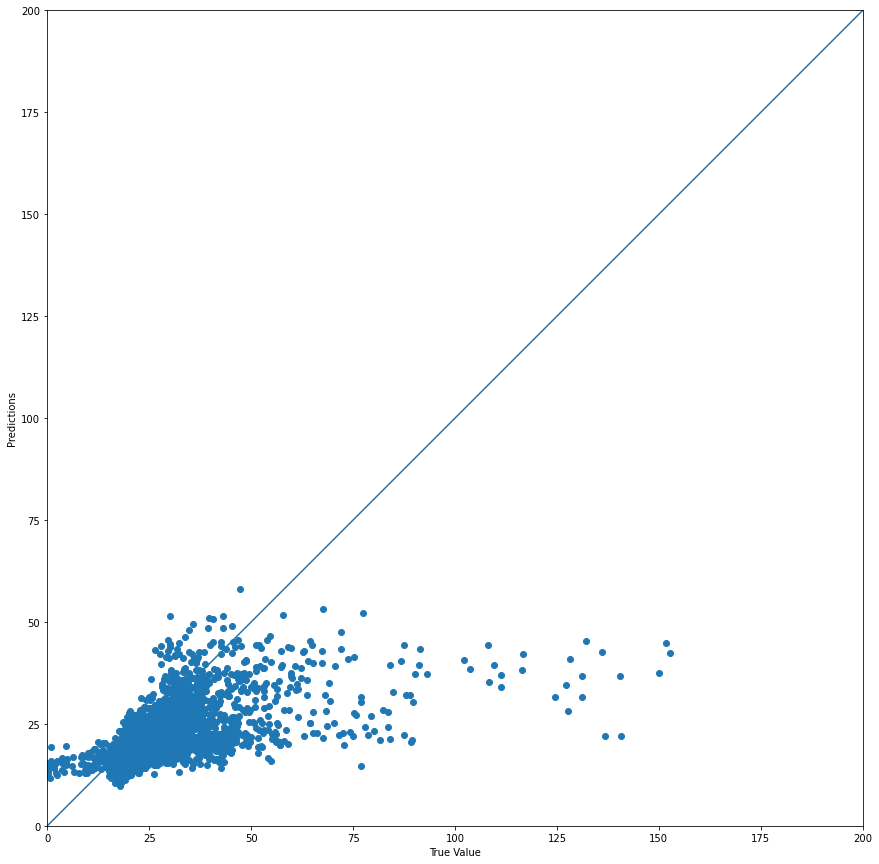

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
a = plt.axes(aspect='equal')
plt.scatter(test_labels['actual'], predictions)
plt.xlabel('True Value')
plt.ylabel('Predictions')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

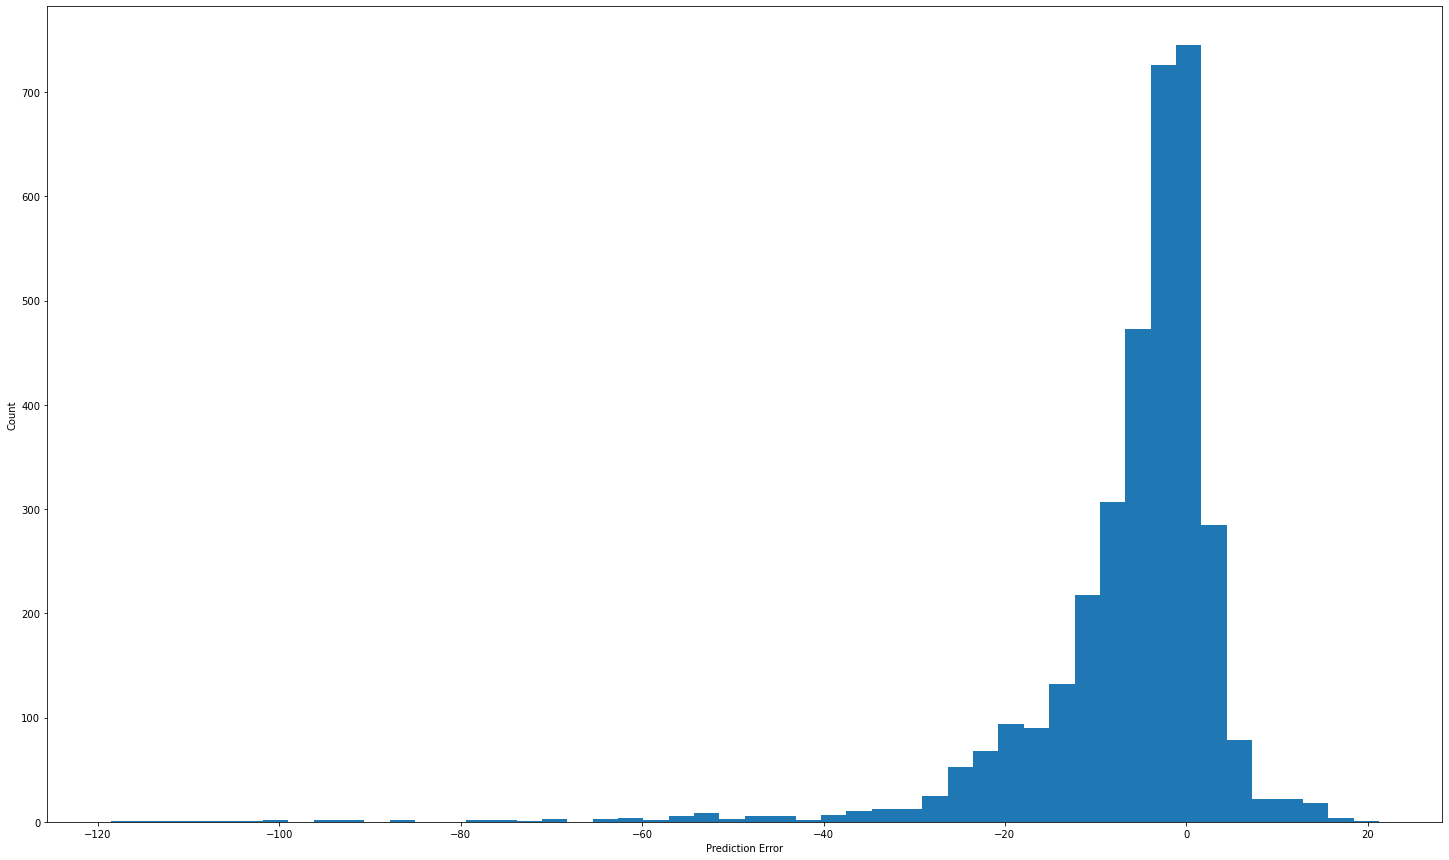

In [44]:
error =predictions['predict']- test_labels['actual']
plt.figure(figsize=(25,15))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [45]:
print(predictions[0:10], test_labels['actual'][0:10], error[0:10])

     predict
0  21.514736
1  19.491181
2  18.800231
3  18.410109
4  17.760088
5  18.194665
6  19.936911
7  21.312757
8  21.112501
9  21.911441 0    19.99
1    18.82
2    18.31
3    17.84
4    17.73
5    17.59
6    18.22
7    19.18
8    19.51
9    20.30
Name: actual, dtype: float64 0    1.524736
1    0.671181
2    0.490231
3    0.570109
4    0.030088
5    0.604665
6    1.716911
7    2.132757
8    1.602501
9    1.611441
dtype: float64


In [46]:
i=0
count=0
for i in range(len(error)):
    if ((error[i])>3) or ((error[i]<-3)):
        count=count+1
print(count)

2015


In [47]:
a = len(test_predictions) - count
a
accuracy = (a/len(test_predictions))*100
print('accuracy:', accuracy)

accuracy: 41.830254041570434


In [48]:
from statistics import mean, stdev
print('Mean of error in test data:', mean(error))
print('Standard deviation of error in test data:', stdev(error))

Mean of error in test data: -6.069568296861225
Standard deviation of error in test data: 11.609358005162495


In [49]:
from statistics import mean, stdev
print('Mean of error in test data:', mean(np.abs(error)))
print('Standard deviation of error in test data:', mean(np.square(error)))

Mean of error in test data: 7.4048371081179205
Standard deviation of error in test data: 171.57794463656242


In [50]:
import datetime
stop=datetime.datetime.now()
print(stop)

2021-12-03 02:38:57.380642


In [51]:
print(stop-start)

1:47:27.419941


In [52]:
from statistics import mean, stdev
print('Mean of test data:', mean(test_labels['actual']))
print('Standard deviation of test data:', stdev(test_labels['actual']))

Mean of test data: 27.91680427251732
Standard deviation of test data: 13.839937893298302


In [53]:
for j in range(1,11):
    i=0
    count=0
    for i in range(len(error)):
        if ((error[i])>j) or ((error[i]<-j)):
            count=count+1
    a = len(predictions) - count
    accuracy = (a/len(predictions))*100
    print("accuracy: with threshold of %i"%j," is %.2f"%accuracy)

accuracy: with threshold of 1  is 16.31
accuracy: with threshold of 2  is 30.66
accuracy: with threshold of 3  is 41.83
accuracy: with threshold of 4  is 50.35
accuracy: with threshold of 5  is 57.39
accuracy: with threshold of 6  is 62.70
accuracy: with threshold of 7  is 67.32
accuracy: with threshold of 8  is 71.54
accuracy: with threshold of 9  is 74.60
accuracy: with threshold of 10  is 77.34
